<a href="https://colab.research.google.com/github/jobsiggang/2024AIClass/blob/main/%EC%99%84%EB%A3%8C3_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B8%B0%EC%B4%88_%EC%BB%B4%ED%93%A8%ED%84%B0%EB%B9%84%EC%A0%84yolo8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
# model = YOLO('yolov8n-seg.pt')
model = YOLO('yolov8n.pt')


100%|██████████| 6.23M/6.23M [00:00<00:00, 52.9MB/s]



image 1/1 /content/drive/MyDrive/image/kang.jpg: 640x640 1 person, 1 dog, 14.7ms
Speed: 4.3ms preprocess, 14.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


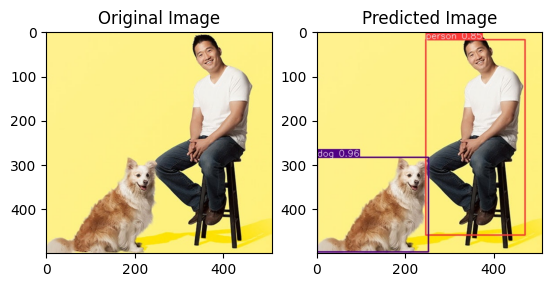

In [ ]:
import matplotlib.pyplot as plt

# 첫 번째 이미지 표시
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 subplot
image_path = "/content/drive/MyDrive/image/kang.jpg"
image = plt.imread(image_path)
plt.imshow(image)
plt.title("Original Image")  # 제목 추가

# 두 번째 이미지 표시
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 subplot
results = model.predict(source=image_path, save=True)
predict_image_path = "runs/detect/predict/kang.jpg"
predict_image = plt.imread(predict_image_path)
plt.imshow(predict_image)
plt.title("Predicted Image")  # 제목 추가

plt.show()  # subplot을 모두 그림


In [ ]:
print(type(model.names), len(model.names))
print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [ ]:
import numpy as np

# 결과를 순회하며 각 클래스별로 등장 횟수 계산
for result in results:
    # 클래스 번호와 등장 횟수를 numpy 배열로 변환
    uniq, cnt = np.unique(result.boxes.cls.cpu().numpy(), return_counts=True)  # Torch.Tensor -> numpy
    # 클래스 번호와 등장 횟수를 딕셔너리로 변환
    uniq_cnt_dict = dict(zip(uniq, cnt))

    # 각 클래스별 등장 횟수 출력
    print('\n{class num:counts} =', uniq_cnt_dict,'\n')

    # 각 객체의 클래스 번호와 클래스 이름 출력
    for c in result.boxes.cls:
        print('class num =', int(c), ', class_name =', model.names[int(c)])



{class num:counts} = {0.0: 1, 16.0: 1} 

class num = 16 , class_name = dog
class num = 0 , class_name = person
